# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

from config import api_key

# Import API key

# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)


f1a313cf23f6bc32f92edeffe96219ac


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



# Print the city count to confirm sufficient count
len(cities)



590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

query_url
city="Arlington, Virginia"

response = requests.get(query_url + city).json()
#response["main"]["temp"]
query_url
response

{'coord': {'lon': -97.11, 'lat': 32.74},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 2.43,
  'pressure': 1027,
  'humidity': 69,
  'temp_min': 1,
  'temp_max': 4},
 'visibility': 16093,
 'wind': {'speed': 9.3, 'deg': 350, 'gust': 16.5},
 'rain': {},
 'clouds': {'all': 90},
 'dt': 1573506263,
 'sys': {'type': 1,
  'id': 5073,
  'country': 'US',
  'sunrise': 1573476890,
  'sunset': 1573515012},
 'timezone': -21600,
 'id': 4671240,
 'name': 'Arlington',
 'cod': 200}

In [4]:
# set up lists to hold reponse info

citiesTemperature= pd.DataFrame(cities, columns=["Cities"])
citiesTemperature["Latitude"]=""
citiesTemperature["Longtitude"]=""
citiesTemperature["Temperature"]=""
citiesTemperature["Humidity"]=""
citiesTemperature["Wind speed"]=""
citiesTemperature["Cloudiness"]=""




citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,kudahuvadhoo,,,,,,
1,punta arenas,,,,,,
2,illoqqortoormiut,,,,,,
3,byumba,,,,,,
4,port elizabeth,,,,,,


In [5]:
# Loop through the list of cities and perform a request for data on each

# call requests:
#response["coord"]["lon"]
#response["coord"]["lat"]
#response["name"]
#response["main"]["humidity"]
#response["wind"]["speed"]
#response["clouds"]["all"]
#response["dt"]

DateRetrieved= pd.to_datetime('today').strftime("%m/%d/%Y")

for index, row in citiesTemperature.iterrows():
        city = row['Cities']
    
        try:
            response = requests.get(query_url + city).json()
            tem=response['main']["temp_max"]
            weather= response["weather"][0]["description"]
            
            #temp.append(response['main']['temp'])
            citiesTemperature.loc[index, "Cities"] = response["name"]
            citiesTemperature.loc[index, "Latitude"] = response["coord"]["lat"]
            citiesTemperature.loc[index, "Longtitude"] = response["coord"]["lon"]
            citiesTemperature.loc[index, "Temperature"] = response['main']["temp_max"]
            citiesTemperature.loc[index, "Humidity"] = response["main"]["humidity"]
            citiesTemperature.loc[index, "Wind speed"] = response["wind"]["speed"]
            citiesTemperature.loc[index, "Cloudiness"] = response["clouds"]["all"]
            print(f"The max temperature of {city} today  is: {tem} and the weather is {weather}")

        except:
            #citiesTemperature.loc[index, "Cities"] = "No Values"
            #print(f"Missing Value")
            continue
            
        



The max temperature of kudahuvadhoo today  is: 28.01 and the weather is light rain
The max temperature of punta arenas today  is: 13 and the weather is clear sky
The max temperature of byumba today  is: 17.78 and the weather is light rain
The max temperature of port elizabeth today  is: 18.89 and the weather is clear sky
The max temperature of gat today  is: 25 and the weather is scattered clouds
The max temperature of busselton today  is: 11.67 and the weather is clear sky
The max temperature of chokurdakh today  is: -15.43 and the weather is overcast clouds
The max temperature of kitob today  is: 5.28 and the weather is clear sky
The max temperature of norman wells today  is: -10 and the weather is broken clouds
The max temperature of kaitangata today  is: 12.78 and the weather is clear sky
The max temperature of pevek today  is: -10.72 and the weather is overcast clouds
The max temperature of qaanaaq today  is: -14.74 and the weather is clear sky
The max temperature of ushuaia today

The max temperature of sarvar today  is: 8 and the weather is broken clouds
The max temperature of yellowknife today  is: -10 and the weather is broken clouds
The max temperature of ponta delgada today  is: 17 and the weather is few clouds
The max temperature of lagoa today  is: 17.22 and the weather is few clouds
The max temperature of goderich today  is: -3.33 and the weather is snow
The max temperature of westport today  is: 16 and the weather is clear sky
The max temperature of tocopilla today  is: 21.35 and the weather is overcast clouds
The max temperature of nome today  is: 25 and the weather is light rain
The max temperature of luderitz today  is: 18 and the weather is clear sky
The max temperature of faya today  is: 17 and the weather is scattered clouds
The max temperature of matara today  is: 15.68 and the weather is overcast clouds
The max temperature of los amates today  is: 25.56 and the weather is light rain
The max temperature of gudalur today  is: 17.07 and the weather

The max temperature of sola today  is: 22.01 and the weather is clear sky
The max temperature of khatanga today  is: -16.86 and the weather is light snow
The max temperature of prokhorovka today  is: 8 and the weather is mist
The max temperature of chapais today  is: -13 and the weather is light snow
The max temperature of banda aceh today  is: 23.04 and the weather is light rain
The max temperature of hualmay today  is: 21.13 and the weather is broken clouds
The max temperature of nalut today  is: 11.32 and the weather is broken clouds
The max temperature of mporokoso today  is: 19.91 and the weather is light rain
The max temperature of arlit today  is: 29.63 and the weather is broken clouds
The max temperature of touba today  is: 29.33 and the weather is broken clouds
The max temperature of rio gallegos today  is: 18 and the weather is scattered clouds
The max temperature of mutata today  is: 25.04 and the weather is moderate rain
The max temperature of wajir today  is: 27.04 and the

The max temperature of lompoc today  is: 23 and the weather is clear sky
The max temperature of esperance today  is: 8 and the weather is broken clouds
The max temperature of morrope today  is: 19 and the weather is few clouds
The max temperature of shitanjing today  is: 6.67 and the weather is clear sky
The max temperature of sumbe today  is: 25.7 and the weather is light rain
The max temperature of hervey bay today  is: 24.44 and the weather is scattered clouds
The max temperature of kachiry today  is: -7.76 and the weather is overcast clouds
The max temperature of yangjiang today  is: 18.4 and the weather is scattered clouds
The max temperature of formosa today  is: 26.64 and the weather is overcast clouds
The max temperature of ketchikan today  is: 8 and the weather is moderate rain
The max temperature of faanui today  is: 26.09 and the weather is scattered clouds
The max temperature of bonfim today  is: 34.63 and the weather is overcast clouds
The max temperature of oum hadjer tod

The max temperature of nuoro today  is: 12 and the weather is light intensity shower rain
The max temperature of hounde today  is: 31.18 and the weather is overcast clouds
The max temperature of malabo today  is: 22.93 and the weather is overcast clouds
The max temperature of karratha today  is: 25.71 and the weather is clear sky
The max temperature of neiafu today  is: 26 and the weather is broken clouds
The max temperature of adrar today  is: 16 and the weather is overcast clouds
The max temperature of chittur today  is: 25 and the weather is mist
The max temperature of chake chake today  is: 26.84 and the weather is few clouds
The max temperature of san quintin today  is: 21.15 and the weather is scattered clouds
The max temperature of salinopolis today  is: 27.75 and the weather is few clouds
The max temperature of lorengau today  is: 27.2 and the weather is moderate rain
The max temperature of inyonga today  is: 22.27 and the weather is light rain
The max temperature of birao toda

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#reformatting and cleaning data

citiesTemperature["Temperature"]=pd.to_numeric(citiesTemperature["Temperature"], downcast='float')
citiesTemperature["Longtitude"]=pd.to_numeric(citiesTemperature["Longtitude"], downcast='float')
citiesTemperature["Latitude"]=pd.to_numeric(citiesTemperature["Latitude"], downcast='float')
citiesTemperature["Humidity"]=pd.to_numeric(citiesTemperature["Humidity"], downcast='float')
citiesTemperature["Wind speed"]=pd.to_numeric(citiesTemperature["Wind speed"], downcast='float')
citiesTemperature["Cloudiness"]=pd.to_numeric(citiesTemperature["Cloudiness"], downcast='float')


citiesTemperature=citiesTemperature.dropna(how="any")

citiesTemperature.dtypes
citiesTemperature.to_csv("Weather Report.csv",index=False)
citiesTemperature.head()

,Cities,Latitude,Longtitude,Temperature,Humidity,Wind speed,Cloudiness
0,Meadow Lake,54.130001,-108.440002,-14.490000,91.0,2.56,89.0
1,Saldanha,41.419998,-6.550000,4.490000,89.0,2.77,100.0
2,Hermanus,-34.419998,19.240000,17.219999,96.0,4.92,55.0
3,Aleksandrovskiy Zavod,50.919998,117.940002,-0.530000,80.0,4.53,100.0
4,Rikitea,-23.120001,-134.970001,23.110001,76.0,5.86,100.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

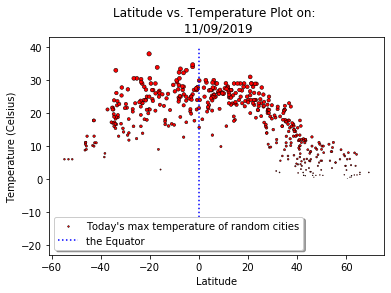

In [9]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Temperature"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.',
            linewidth=0.5,
            label="Today's max temperature of random cities",
            facecolors="red", edgecolors="black",
            s=2*y)
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Temperature Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.vlines(0,-20,40, alpha=1, color='blue', label='the Equator', linestyles='dotted')
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

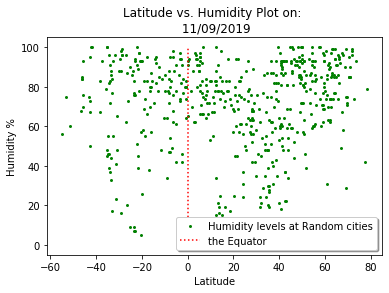

In [10]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Humidity"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='green', linewidth=0, label="Humidity levels at Random cities")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Humidity Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.vlines(0,0,100, alpha=1, color='red', label='the Equator', linestyles='dotted')
plt.legend(loc='best', framealpha =1,shadow = True ) 


# Show the Figure
plt.savefig("Images/Latitude vs. Humidity Plot.png")
plt.show()


#### Latitude vs. Cloudiness Plot

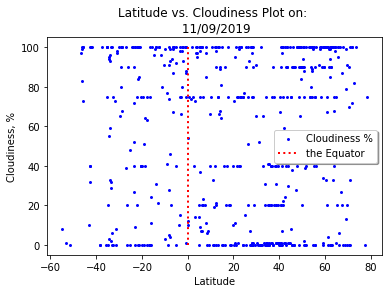

In [11]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Cloudiness"]


#plotting the axises
plt.scatter(x_axis, y,marker ='.', color='blue', linewidth=0,label="Cloudiness %")
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Cloudiness Plot on: \n {DateRetrieved}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness, %")
plt.vlines(0,0,100,
           color='red',
           label='the Equator',
           linestyles='dotted',
           linewidth=2)

plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

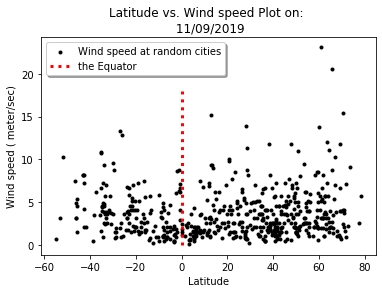

In [12]:
#defining axis:
x_axis=citiesTemperature["Latitude"]
y=citiesTemperature["Wind speed"]


#plotting the axises
plt.scatter(x_axis,
            y,marker ='.',
            color='black',
            linewidth=1,
            label="Wind speed at random cities",
            )
#plt.grid(axis='x')

#adding legend and titles
plt.title(f"Latitude vs. Wind speed Plot on: \n {DateRetrieved}" )
plt.xlabel("Latitude")
plt.ylabel("Wind speed ( meter/sec)")
plt.vlines(0,0,18, alpha=1, color='red', label='the Equator', linestyles='dotted', linewidth=3)
plt.legend(loc='best', shadow = True) 


# Show the Figure
plt.savefig("Images/Latitude vs. Wind speed Plot.png")
plt.show()

## Observations

1. There seems to be a strong visual indication of a relationship between current temperature and proximity to the equator. As cities are located closer to the equator the current temperature seems to rise. 

2. There is no visual indication of any relationship between humidity and cloudiness.

3. But there seems to be some visual correlation between current wind speed and proximity to the Equator.